In [4]:
import numpy as np
theta_r = np.array([3,8,11,15,22,28,35,41,47,53])
thetaRad = np.deg2rad(theta_r)
sinthetaR = np.sin(thetaRad)
print(sinthetaR)




[0.05233596 0.1391731  0.190809   0.25881905 0.37460659 0.46947156
 0.57357644 0.65605903 0.7313537  0.79863551]


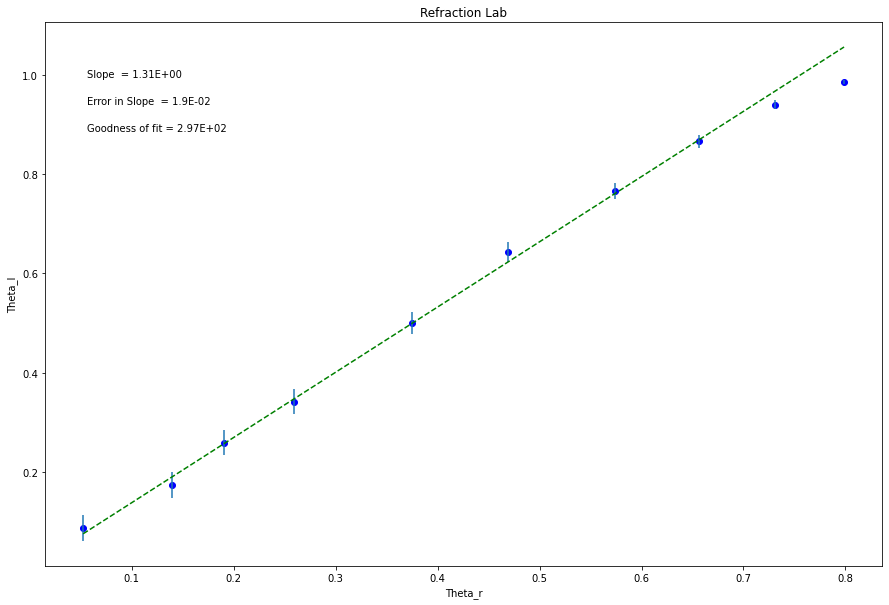

In [8]:

#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt

#Data
theta_r = np.array([3,8,11,15,22,28,35,41,47,53])
thetaRad = np.deg2rad(theta_r)
sinthetaR = np.sin(thetaRad)








#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data

thetaI = np.array([5,10,15,20,30,40,50,60,70,80]) #what are units?
radthetaI = np.deg2rad(thetaI)
sinthetaI = np.sin(radthetaI)


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_sinthetaI = np.array([0.026047471,0.0257197568,0.0251962996,0.0244810834,0.0224985647,0.0198324385,0.0165637137,0.0127917089,0.0086310344,0.0042081103])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = sinthetaR  #this should be the array you want to plot on the x axis
y = sinthetaI
dy = err_sinthetaI  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Theta_r')
plt.ylabel('Theta_I')
plt.title('Refraction Lab')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope  = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope  = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
